This script filters the table produced by *rawtweet_analysis* to produce the relevant plots as well as the linear regression analysis.

# Analysis of released films




#### This analysis looks at box office performance of movies that had been released.
#### movies with negative "days since release", that is, not yet released, are not included in the analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

df = pd.read_csv('analysis_results/allfilms.csv')
# filter out only rows where "days since release" greater or equal to 0
released = df.loc[df["days since release"]>=0, :].reset_index(drop = True)

# add a column to the table marking numbers of weeks a movie has been released, 
# anything more than 8 weeks are binned as 8+ weeks
week_cutoff = [-1, 6, 13, 20, 27, 34, 41, 48, 55, 150]
week = list(range(9))
released["weeks since release"] = pd.cut(df["days since release"], week_cutoff, labels=week)
released["box office"] = released["box office"]/1000
released.head()

,day,daily tweet count,day of week,title,box office,days since release,weekend,star,weeks since release
0,18.0,55.0,2.0,RampageMovie,5.098,97.0,0.0,1721.0,8
1,19.0,46.0,3.0,RampageMovie,4.059,98.0,0.0,1721.0,8
2,20.0,35.0,4.0,RampageMovie,35.295,99.0,1.0,1721.0,8
3,21.0,41.0,5.0,RampageMovie,49.155,100.0,1.0,1721.0,8
4,22.0,27.0,6.0,RampageMovie,40.598,101.0,1.0,1721.0,8


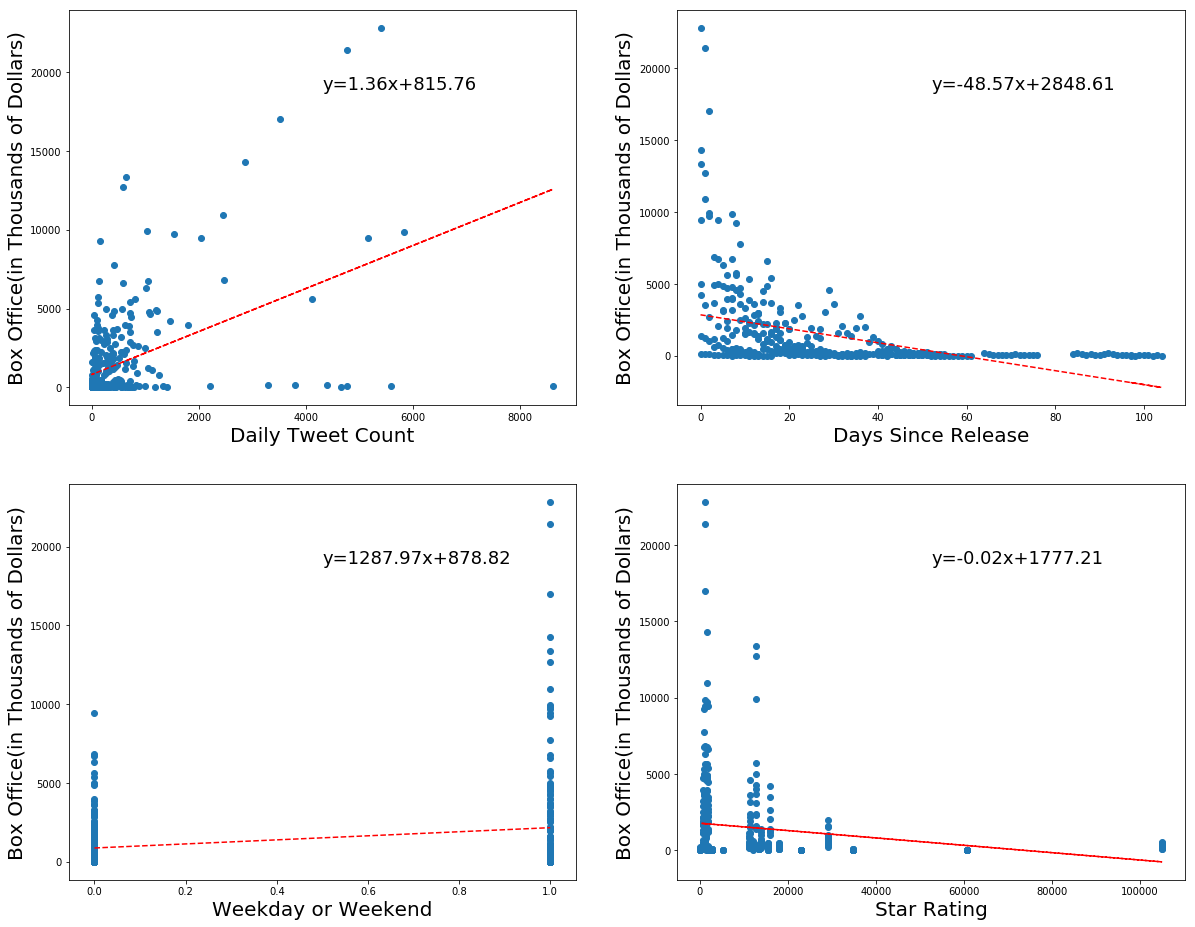

In [2]:
#exploratory graphs
fig = plt.figure(figsize = (20,16))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

x1 = released["daily tweet count"]
x2 = released["days since release"]
x3 = released["weekend"]
x4 = released["star"]
y = released["box office"]

def exploratoryplots(ax, x, y, axistitle):
    ax.scatter(x,y)
    fit = np.polyfit(x, y, 1)
    p = np.poly1d(fit)
    ax.plot(x,p(x),"r--")
    eq = "y=%.2fx+%.2f"%(fit[0],fit[1])
    ax.text(0.5,0.8,eq,transform=ax.transAxes, fontsize = 18)
    ax.set_xlabel(axistitle, fontsize = 20)
    ax.set_ylabel("Box Office(in Thousands of Dollars)", fontsize = 20)

exploratoryplots(ax1, x1,y, 'Daily Tweet Count')
exploratoryplots(ax2, x2,y, 'Days Since Release')
exploratoryplots(ax3, x3,y, 'Weekday or Weekend')
exploratoryplots(ax4, x4,y, 'Star Rating')



In [3]:
def regression(df):
    y = df['box office']
    X = df[['daily tweet count', 'days since release', 'weekend','star']]

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return (model)
    
regression(released).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             box office   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     79.55
Date:                Sat, 04 Aug 2018   Prob (F-statistic):           9.43e-49
Time:                        17:51:40   Log-Likelihood:                -3418.7
No. Observations:                 378   AIC:                             6847.
Df Residuals:                     373   BIC:                             6867.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2183.3238    213.323     10.235      0.000    1763.858    2602.790
daily tweet count      1.3706      0.112     12.200      0.000       1.150       1.591
days since release   -51.6851      4.527    -11.416      0.000     -60.587     -42.783
weekend              842.9375    216.434      3.895      0.000     417.353    1268.522
star                  -0.0144      0.005     -3.051      0.002      -0.024      -0.005
==============================================================================
Omnibus:                      190.456   Durbin-Watson:                   0.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1776.449
Skew:                           1.912   Prob(JB):                         0.00
Kurtosis:                      12.908   Cond. No.                     6.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

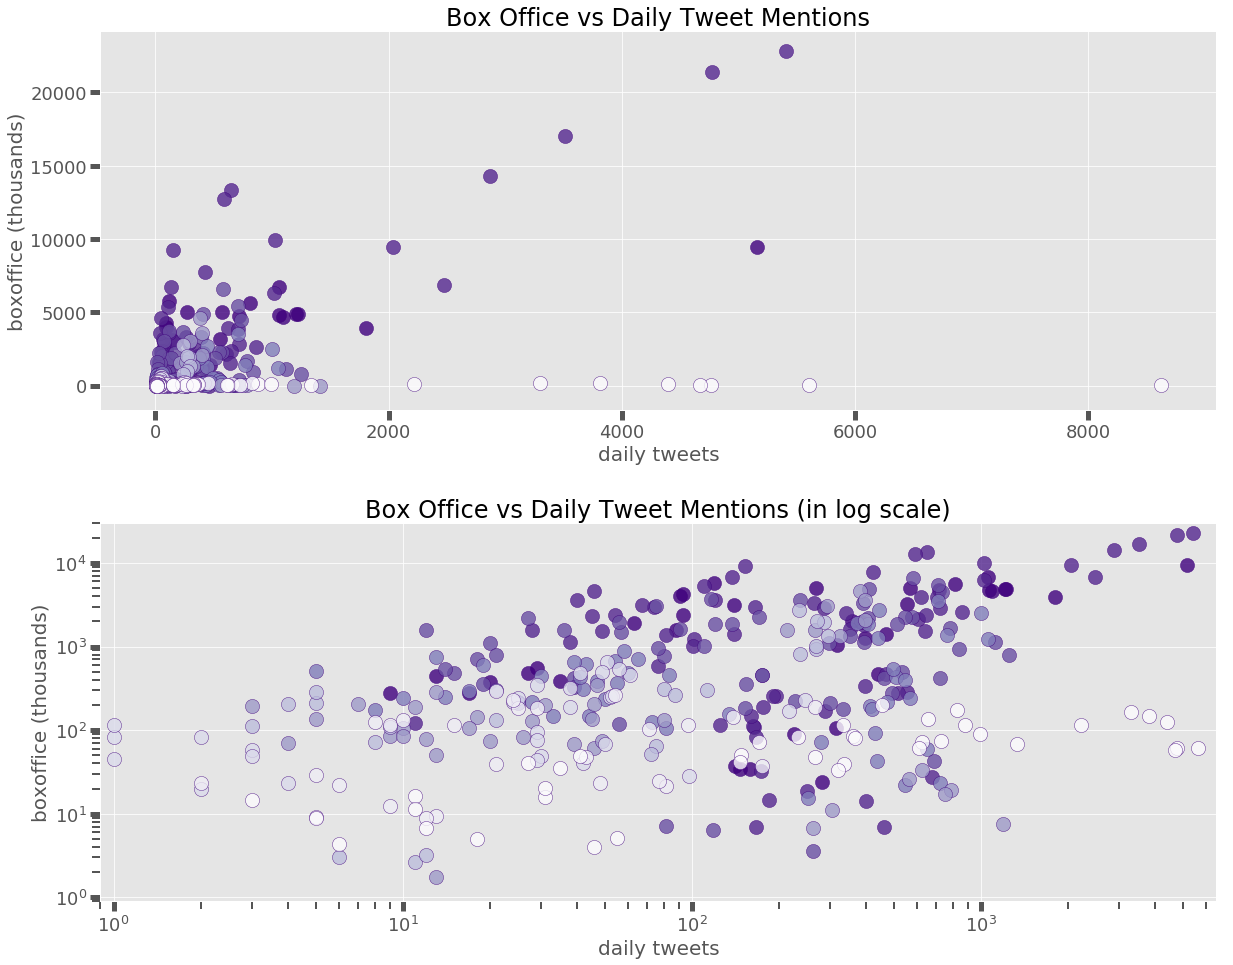

In [4]:
plt.style.use('ggplot')

# Make a list of colors to be used for the scatter plot. Data points for newer movies have darker color
colorlist = ["#3f007d","#54278f","#6a51a3","#807dba","#9e9ac8","#bcbddc","#dadaeb","#efedf5","#fcfbfd"]

fig = plt.figure(figsize = (20,16))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# A function that takes in the subplot handle and formats the subplot
def figformat(ax, title):
    ax.set_xlabel('daily tweets', fontsize = 20)
    ax.set_ylabel('boxoffice (thousands)', fontsize = 20)
    ax.set_title(title, fontsize = 24)
    ax.tick_params(axis='both', length = 10, width = 5, labelsize = 18)
    ax.tick_params(axis='both', which = "minor", length = 8, width = 2)
    
def figformat2(ax):
    ax.set_xscale('log')
    ax.set_yscale('log') 
    ax.set_xlim(0.9, 6500)
    ax.set_ylim(0.9, 30000)

# Plot the data points for one week at a time
for i in range(9):
    weekly = released.loc[(released["weeks since release"] == i) , :].reset_index(drop= True)
    x = weekly["daily tweet count"]
    y = weekly["box office"]
    color = colorlist[i]
     
    ax1.scatter(x, y, c = color, edgecolor = "#3f007d", s = 200, alpha = 0.8)
    ax2.scatter(x, y, c = color, edgecolor = "#3f007d", s = 200, alpha = 0.8)

figformat(ax1, "Box Office vs Daily Tweet Mentions")
figformat(ax2, "Box Office vs Daily Tweet Mentions (in log scale)")
figformat2(ax2)

plt.subplots_adjust(hspace=0.3)
plt.savefig('analysis_results/overallplot.png')

#### In the above analysis, visually examining the scatter plot show outliers that have been in theater for a long time (light color circles) and thus weak box office performances, but continue to garner twitter mentions.  
#### A box plot is used to explore the possiblity those films are outliers. The below boxplot looks at the number of days movies have been out for, as of August 4th, 2018.

In [5]:
releasedate = pd.read_csv('info/releasedate.csv')
releasedate = releasedate.set_index("title")

releasedate["Days Since Release"] = 36 - releasedate["Opening Date"] #Day 1 is July 1st, August 5th is Day 36
releasedate.head()

,Opening Date,Days Since Release
title,,
RampageMovie,-79,115
InfinityWar,-64,100
Deadpool2,-43,79
AdriftMovie,-29,65
Hereditary,-22,58


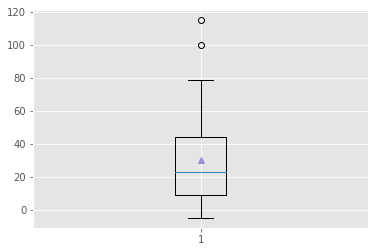

In [6]:
dataset = releasedate["Days Since Release"]
plt.boxplot(dataset, showmeans=True) 
plt.show()

#### The box plot shows that the two films that had been out the longest *Rampage* and *The Avengers: Infinity War*, are outliers in terms out of days out in theater.
    
#### Highlighting the data points for those two movies in the scatter plot confirms they are the outliers in the tweet mention and box office correlation.

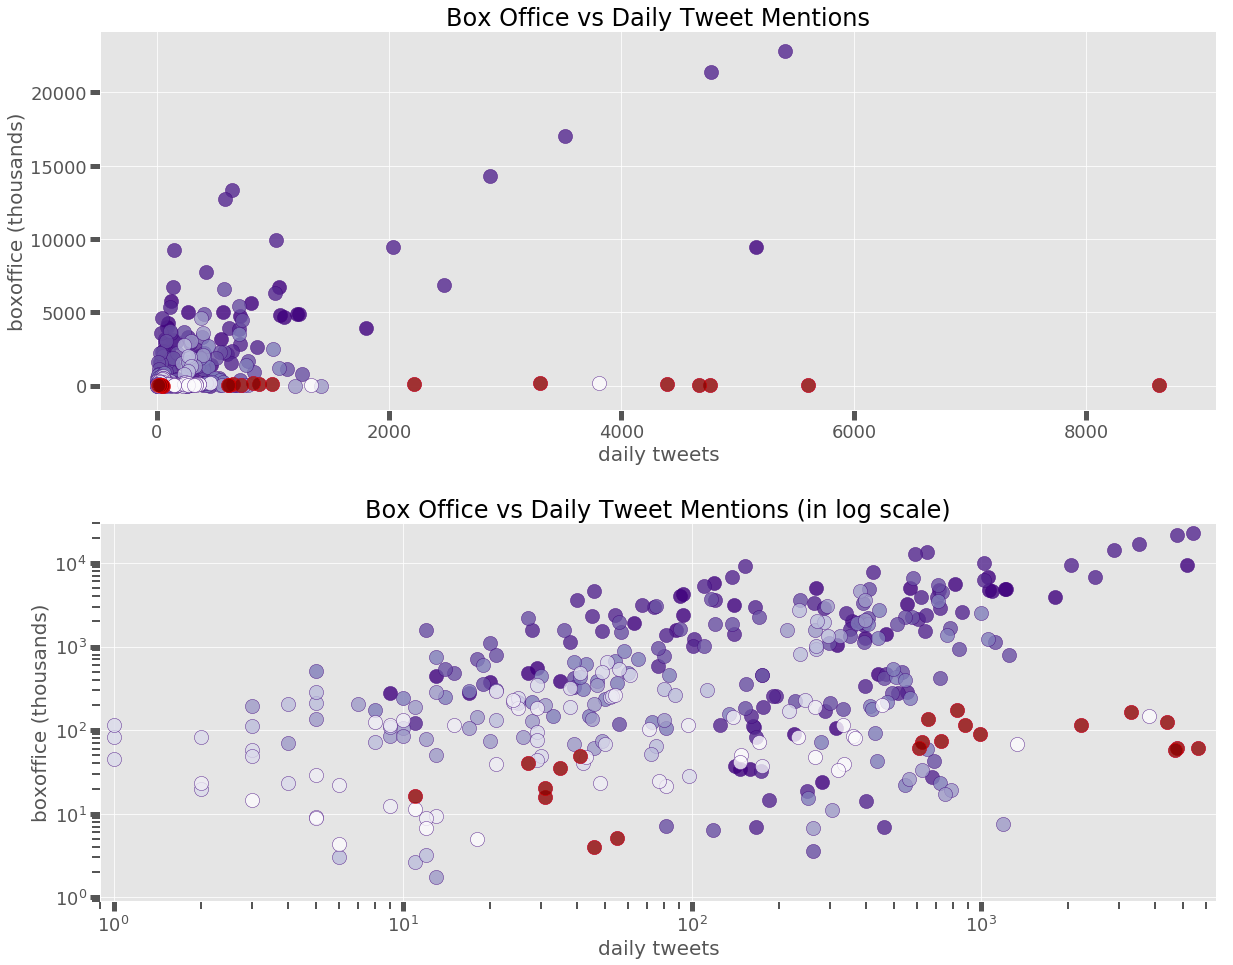

In [7]:
rampage_infinity = released.loc[released["title"].isin (["RampageMovie","InfinityWar"])].reset_index(drop = True)

fig = plt.figure(figsize = (20,16))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Plot the data points for one week at a time
for i in range(9):
    weekly = released.loc[(released["weeks since release"] == i) , :].reset_index(drop= True)
    x = weekly["daily tweet count"]
    y = weekly["box office"]
    color = colorlist[i]
     
    ax1.scatter(x, y, c = color, edgecolor = "#3f007d", s = 200, alpha = 0.8)
    ax2.scatter(x, y, c = color, edgecolor = "#3f007d", s = 200, alpha = 0.8)

x = rampage_infinity["daily tweet count"]
y = rampage_infinity["box office"]
ax1.scatter(x, y, c = "#8B0000", edgecolor = "#FF0000", s = 200, alpha = 0.8)
ax2.scatter(x, y, c = "#8B0000", edgecolor = "#FF0000", s = 200, alpha = 0.8)    

figformat(ax1, "Box Office vs Daily Tweet Mentions")
figformat(ax2, "Box Office vs Daily Tweet Mentions (in log scale)")
figformat2(ax2)

plt.subplots_adjust(hspace=0.3)
plt.savefig('analysis_results/outliers.png')

In [8]:
no_outliers = released.loc[~released["title"].isin (["RampageMovie","InfinityWar"])].reset_index(drop = True)
regression(no_outliers).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             box office   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     122.8
Date:                Sat, 04 Aug 2018   Prob (F-statistic):           2.01e-65
Time:                        17:57:05   Log-Likelihood:                -3181.8
No. Observations:                 356   AIC:                             6374.
Df Residuals:                     351   BIC:                             6393.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1626.3053    220.896      7.362      0.000    1191.858    2060.752
daily tweet count      2.3237      0.143     16.305      0.000       2.043       2.604
days since release   -42.3388      5.825     -7.268      0.000     -53.796     -30.882
weekend              655.0794    201.839      3.246      0.001     258.114    1052.045
star                  -0.0109      0.004     -2.537      0.012      -0.019      -0.002
==============================================================================
Omnibus:                      125.356   Durbin-Watson:                   0.670
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              871.651
Skew:                           1.290   Prob(JB):                    5.29e-190
Kurtosis:                      10.219   Cond. No.                     7.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### By removing *Rampage* and *The Avengers: Infinity War*, R-squared improved from 0.486 to 0.609.

#### It can be reasoned that these two films have been in theater for an unusually long amount of time because their box office overall performed exceptionally well and received ample amounts of attention. 

#### Additionally, both films are based on already established franchises, so it's likely that the fanbase continue to mention the movie's hashtag in tweets in discussions not directly related to seeing the movie itself. (e.g. Cosplay or Marvel giveaway.)

#### To explore the possibility that movies that had in theater for a long time have weaker correlation between tweeter mentions and box office, regression analysis were repeated for films released less than 5 weeks.

In [9]:
print(f"all released films: r-squared = {regression(released).rsquared}")
print(f"released films excluding Infinity War & Rampage: r-squared = {regression(no_outliers).rsquared}")

sevenweeks = released.loc[released["days since release"]<=48, :]
print(f"films less than 7 weeks old: r-squared = {regression(sevenweeks).rsquared}")

sixweeks = released.loc[released["days since release"]<=41, :]
print(f"films less than 6 weeks old: r-squared = {regression(sixweeks).rsquared}")

fiveweeks = released.loc[released["days since release"]<=34, :]
print(f"films less than 5 weeks old: r-squared = {regression(fiveweeks).rsquared}")

fourweeks = released.loc[released["days since release"]<=27, :]
print(f"films less than 4 weeks old: r-squared = {regression(fourweeks).rsquared}")

all released films: r-squared = 0.4603709026266768
released films excluding Infinity War & Rampage: r-squared = 0.583249255176236
films less than 7 weeks old: r-squared = 0.6122008852446292
films less than 6 weeks old: r-squared = 0.6322770825763239
films less than 5 weeks old: r-squared = 0.6528879812999302
films less than 4 weeks old: r-squared = 0.6564557160223569


#### R-squared for regression including films 7 weeks old or newer improved comparing to just taking out *Infinity War* and *Rampage*. However, from week 7 and on, excluding older films does not change R-squared notably.

#### Below is the scatter plot of twitter mentions and box office performs of films 7 weeks old or newer 

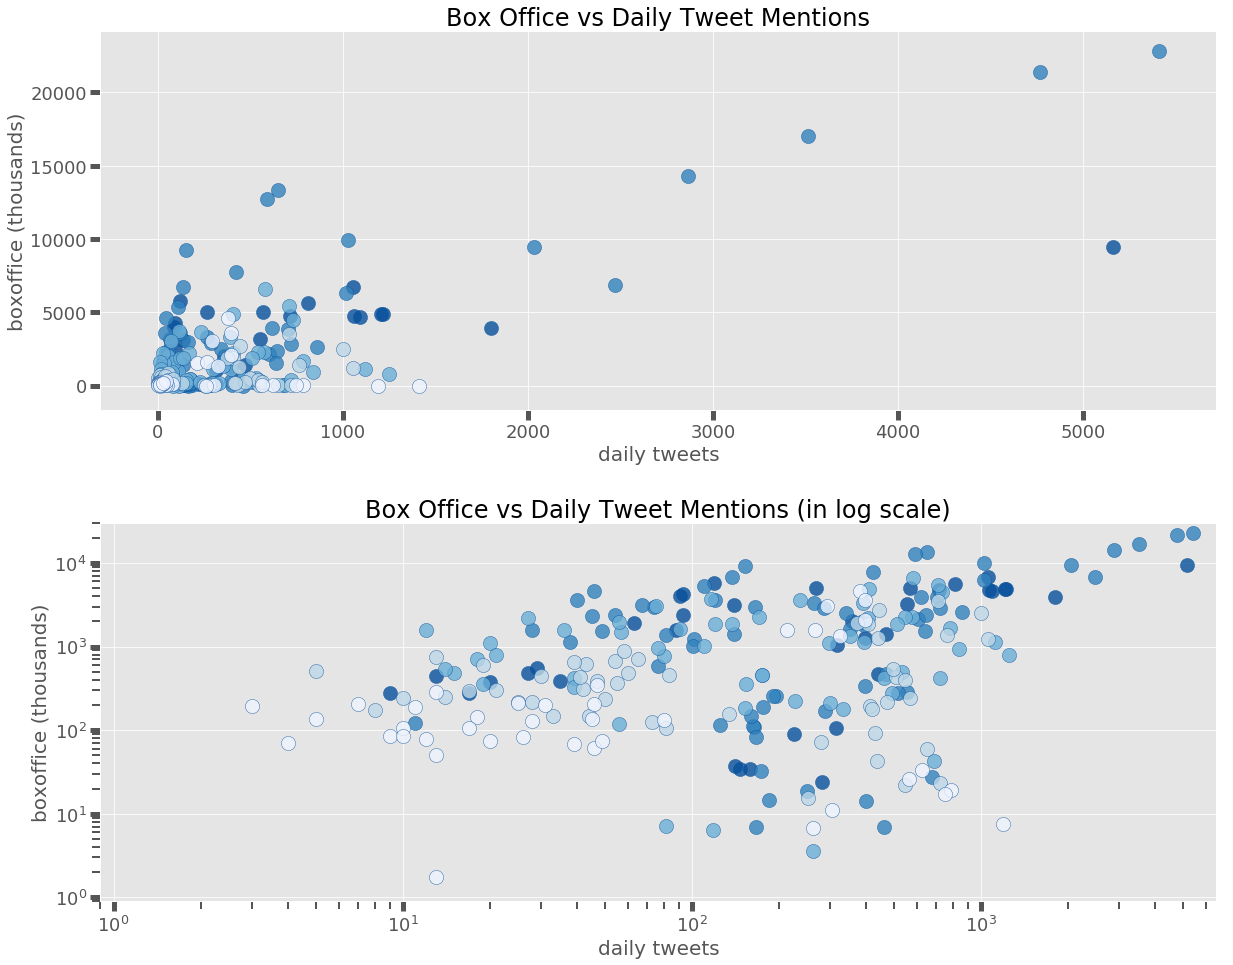

In [10]:
fig = plt.figure(figsize = (20,16))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

colorlist = ["#08519c","#3182bd","#6baed6","#bdd7e7","#eff3ff"]

# Plot the data points for one week at a time
for i in range(5):
    weekly = fiveweeks.loc[(fiveweeks["weeks since release"] == i) , :].reset_index(drop= True)
    x = weekly["daily tweet count"]
    y = weekly["box office"]
    color = colorlist[i]
     
    ax1.scatter(x, y, c = color, edgecolor = "#08519c", s = 200, alpha = 0.8)
    ax2.scatter(x, y, c = color, edgecolor = "#08519c", s = 200, alpha = 0.8)   

figformat(ax1, "Box Office vs Daily Tweet Mentions")
figformat(ax2, "Box Office vs Daily Tweet Mentions (in log scale)")
figformat2(ax2)

plt.subplots_adjust(hspace=0.3)
plt.savefig('analysis_results/overallplot five weeks or newer.png')

In [11]:
model = regression(fiveweeks)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             box office   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     119.4
Date:                Sat, 04 Aug 2018   Prob (F-statistic):           3.66e-57
Time:                        17:58:49   Log-Likelihood:                -2321.4
No. Observations:                 259   AIC:                             4653.
Df Residuals:                     254   BIC:                             4671.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2751.1649    328.834      8.366      0.000    2103.576    3398.754
daily tweet count      2.2491      0.161     13.941      0.000       1.931       2.567
days since release   -85.1028     13.310     -6.394      0.000    -111.314     -58.891
weekend              840.4784    247.594      3.395      0.001     352.880    1328.077
star                  -0.0567      0.009     -6.360      0.000      -0.074      -0.039
==============================================================================
Omnibus:                       77.482   Durbin-Watson:                   0.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.840
Skew:                           1.131   Prob(JB):                     3.26e-78
Kurtosis:                       8.287   Cond. No.                     5.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
indep_var = fiveweeks[["daily tweet count","days since release","weekend","star"]]
correlation_matrix = np.corrcoef(indep_var, rowvar=0)

#https://stackoverflow.com/questions/25676145/capturing-high-multi-collinearity-in-statsmodels
#determinant of the correlation matrix will "range from 0 (Perfect Collinearity) to 1 (No Collinearity)"
#the condition number of the covariance matrix will approach infinity with perfect linear dependence.

print (f"correlation matrix determinant = {np.linalg.det(correlation_matrix)}")
print (f"condition number of the covariance matrix = {np.linalg.cond(correlation_matrix)}")

correlation matrix determinant = 0.7976949346340313
condition number of the covariance matrix = 2.4678902263267566


Text(0,0.5,'Residuals')

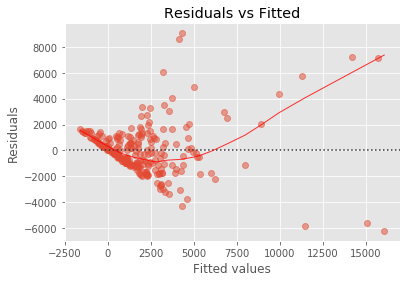

In [13]:
#https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
# fitted values (need a constant term for intercept)
model_fitted_y = model.fittedvalues
model_norm_residuals = model.get_influence().resid_studentized_internal
import seaborn as sns
plot_lm_1 = plt.figure()

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'box office', data=fiveweeks, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

### Funnel shaped residual plot implies non-constant variance, or heteroscedasticity.

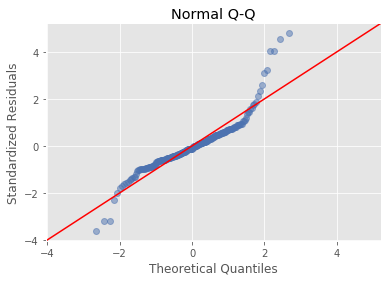

In [14]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');


### upwards curve in QQ-plot implies positive skew, confirmed by a box plot of the box office.

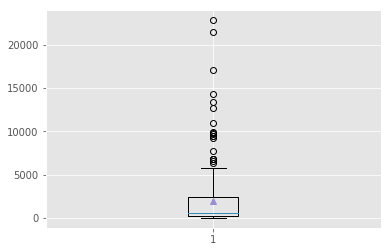

In [15]:
dataset = fiveweeks["box office"]
plt.boxplot(dataset, showmeans=True) 
plt.show()